data source: https://github.com/mdcollab/covidclinicaldata/tree/master/data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV






import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# load the car data dataset
try:
    data1 = pd.read_csv("covidclinicaldata/data/04-07_carbonhealth_and_braidhealth.csv", delimiter=",")
    print(" dataset has {} samples with {} features each.".format(*data1.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

 dataset has 922 samples with 45 features each.


In [3]:
# load the car data dataset
try:
    data2 = pd.read_csv("covidclinicaldata/data/04-14_carbonhealth_and_braidhealth.csv", delimiter=",")
    print(" dataset has {} samples with {} features each.".format(*data2.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

 dataset has 367 samples with 45 features each.


In [4]:
# load the car data dataset
try:
    data3 = pd.read_csv("covidclinicaldata/data/04-21_carbonhealth_and_braidhealth.csv", delimiter=",")
    print(" dataset has {} samples with {} features each.".format(*data3.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

 dataset has 322 samples with 45 features each.


In [5]:
data = pd.concat([data1, data2, data3])
data.head()

,date_published,clinic_state,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,asthma,copd,autoimmune_dis,temperature,pulse,sys,dia,rr,sats,rapid_flu_results,rapid_strep_results,days_since_symptom_onset,ctab,labored_respiration,rhonchi,wheezes,cough,cough_severity,fever,sob,sob_severity,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_link,er_referral
0,2020-04-07,CA,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,36,True,NaN,False,False,False,False,False,False,False,36.75,106.0,141.0,90.0,12.0,100.0,NaN,NaN,NaN,True,False,False,False,False,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2020-04-07,CA,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,35,False,NaN,False,False,False,False,False,False,False,37.25,68.0,136.0,82.0,18.0,100.0,NaN,NaN,14.0,False,False,True,True,True,Moderate,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2020-04-07,CA,SARS COV 2 RNA RTPCR,Oropharyngeal,Negative,18,True,NaN,False,False,False,False,False,False,False,37.10,95.0,108.0,69.0,12.0,97.0,NaN,NaN,7.0,True,False,False,False,True,Mild,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2020-04-07,CA,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,46,NaN,NaN,False,False,False,False,False,False,False,37.25,95.0,137.0,85.0,16.0,99.0,NaN,NaN,NaN,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,2020-04-07,CA,SARS COV 2 RNA RTPCR,Nasopharyngeal,Negative,29,NaN,NaN,False,False,False,False,False,False,False,36.70,75.0,118.0,73.0,14.0,100.0,NaN,NaN,NaN,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 321
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_published                 1611 non-null   object 
 1   clinic_state                   1611 non-null   object 
 2   test_name                      1611 non-null   object 
 3   swab_type                      1611 non-null   object 
 4   covid19_test_results           1611 non-null   object 
 5   age                            1611 non-null   int64  
 6   high_risk_exposure_occupation  1148 non-null   object 
 7   high_risk_interactions         719 non-null    object 
 8   diabetes                       1611 non-null   bool   
 9   chd                            1611 non-null   bool   
 10  htn                            1611 non-null   bool   
 11  cancer                         1611 non-null   bool   
 12  asthma                         1611 non-null   bo

In [7]:
list_of_columns = list(data.select_dtypes(['bool']).columns)
data[list_of_columns] = data[list_of_columns].apply(lambda col:pd.Categorical(col).codes)#.replace(-1,np.nan)
#del data["cxr_findings", "cxr_impression", "cxr_link"]

In [8]:
data.cough_severity.value_counts()

Mild        344
Moderate    325
Severe       40
Name: cough_severity, dtype: int64

In [9]:
data.cxr_impression.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: cxr_impression, dtype: object

In [10]:
data.cancer.value_counts()

0    1575
1      36
Name: cancer, dtype: int64

In [11]:
person_onehot_columns = ["swab_type","test_name", "cough_severity", "sob_severity", "clinic_state", 
                         "high_risk_exposure_occupation", "high_risk_interactions", "rapid_flu_results", 
                         "rapid_strep_results", "ctab", "labored_respiration", "rhonchi", "wheezes", "cough",
                         "cough_severity", "fever", "sob", "sob_severity", "diarrhea", "fatigue", "headache", 
                         "loss_of_smell", "loss_of_taste", "runny_nose", "muscle_sore", "sore_throat" ]
onehot_columns_prefix = ["swab_type","test_name", "cough_severity", "sob_severity", "clinic_state", 
                         "high_risk_exposure_occupation", "high_risk_interactions", "rapid_flu_results", 
                         "rapid_strep_results", "ctab", "labored_respiration", "rhonchi", "wheezes", "cough",
                         "cough_severity", "fever", "sob", "sob_severity", "diarrhea", "fatigue", "headache", 
                         "loss_of_smell", "loss_of_taste", "runny_nose", "muscle_sore", "sore_throat"]

one_hot_data = pd.get_dummies(data,prefix=onehot_columns_prefix, columns=person_onehot_columns)
one_hot_data.head()

,date_published,covid19_test_results,age,diabetes,chd,htn,cancer,asthma,copd,autoimmune_dis,temperature,pulse,sys,dia,rr,sats,days_since_symptom_onset,cxr_findings,cxr_impression,cxr_link,er_referral,swab_type_Nasal,swab_type_Nasopharyngeal,swab_type_Oropharyngeal,test_name_Rapid COVID-19 Test,test_name_SARS COV 2 RNA RTPCR,test_name_SARS COV2 NAAT,test_name_SARS CoV w/CoV 2 RNA,"test_name_SARS-CoV-2, NAA",cough_severity_Mild,cough_severity_Moderate,cough_severity_Severe,sob_severity_Mild,sob_severity_Moderate,sob_severity_Severe,clinic_state_CA,high_risk_exposure_occupation_False,high_risk_exposure_occupation_True,high_risk_interactions_False,high_risk_interactions_True,rapid_flu_results_Negative,rapid_flu_results_Positive,rapid_strep_results_Negative,rapid_strep_results_Positive,ctab_False,ctab_True,labored_respiration_False,labored_respiration_True,rhonchi_False,rhonchi_True,wheezes_False,wheezes_True,cough_False,cough_True,cough_severity_Mild,cough_severity_Moderate,cough_severity_Severe,fever_False,fever_True,sob_False,sob_True,sob_severity_Mild,sob_severity_Moderate,sob_severity_Severe,diarrhea_False,diarrhea_True,fatigue_False,fatigue_True,headache_False,headache_True,loss_of_smell_False,loss_of_smell_True,loss_of_taste_False,loss_of_taste_True,runny_nose_False,runny_nose_True,muscle_sore_False,muscle_sore_True,sore_throat_False,sore_throat_True
0,2020-04-07,Negative,36,0,0,0,0,0,0,0,36.75,106.0,141.0,90.0,12.0,100.0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-04-07,Negative,35,0,0,0,0,0,0,0,37.25,68.0,136.0,82.0,18.0,100.0,14.0,NaN,NaN,NaN,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-04-07,Negative,18,0,0,0,0,0,0,0,37.10,95.0,108.0,69.0,12.0,97.0,7.0,NaN,NaN,NaN,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-04-07,Negative,46,0,0,0,0,0,0,0,37.25,95.0,137.0,85.0,16.0,99.0,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-04-07,Negative,29,0,0,0,0,0,0,0,36.70,75.0,118.0,73.0,14.0,100.0,NaN,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
del one_hot_data["cxr_findings"]
del one_hot_data["cxr_impression"]
del one_hot_data["cxr_link"]
#del one_hot_data["cxr_findings"]
#del one_hot_data["cxr_findings"]


In [13]:
one_hot_data.shape

(1611, 77)

In [14]:
one_hot_data.date_published.value_counts()

2020-04-07    922
2020-04-14    367
2020-04-21    322
Name: date_published, dtype: int64

In [15]:
one_hot_data.head()

,date_published,covid19_test_results,age,diabetes,chd,htn,cancer,asthma,copd,autoimmune_dis,temperature,pulse,sys,dia,rr,sats,days_since_symptom_onset,er_referral,swab_type_Nasal,swab_type_Nasopharyngeal,swab_type_Oropharyngeal,test_name_Rapid COVID-19 Test,test_name_SARS COV 2 RNA RTPCR,test_name_SARS COV2 NAAT,test_name_SARS CoV w/CoV 2 RNA,"test_name_SARS-CoV-2, NAA",cough_severity_Mild,cough_severity_Moderate,cough_severity_Severe,sob_severity_Mild,sob_severity_Moderate,sob_severity_Severe,clinic_state_CA,high_risk_exposure_occupation_False,high_risk_exposure_occupation_True,high_risk_interactions_False,high_risk_interactions_True,rapid_flu_results_Negative,rapid_flu_results_Positive,rapid_strep_results_Negative,rapid_strep_results_Positive,ctab_False,ctab_True,labored_respiration_False,labored_respiration_True,rhonchi_False,rhonchi_True,wheezes_False,wheezes_True,cough_False,cough_True,cough_severity_Mild,cough_severity_Moderate,cough_severity_Severe,fever_False,fever_True,sob_False,sob_True,sob_severity_Mild,sob_severity_Moderate,sob_severity_Severe,diarrhea_False,diarrhea_True,fatigue_False,fatigue_True,headache_False,headache_True,loss_of_smell_False,loss_of_smell_True,loss_of_taste_False,loss_of_taste_True,runny_nose_False,runny_nose_True,muscle_sore_False,muscle_sore_True,sore_throat_False,sore_throat_True
0,2020-04-07,Negative,36,0,0,0,0,0,0,0,36.75,106.0,141.0,90.0,12.0,100.0,NaN,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-04-07,Negative,35,0,0,0,0,0,0,0,37.25,68.0,136.0,82.0,18.0,100.0,14.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-04-07,Negative,18,0,0,0,0,0,0,0,37.10,95.0,108.0,69.0,12.0,97.0,7.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-04-07,Negative,46,0,0,0,0,0,0,0,37.25,95.0,137.0,85.0,16.0,99.0,NaN,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-04-07,Negative,29,0,0,0,0,0,0,0,36.70,75.0,118.0,73.0,14.0,100.0,NaN,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
one_hot_data.covid19_test_results = pd.Categorical(one_hot_data.covid19_test_results)
one_hot_data['target'] = one_hot_data.covid19_test_results.cat.codes
#sub2['income'].fillna((sub2['income'].mean()), inplace=True)
del one_hot_data["covid19_test_results"]

In [17]:
one_hot_data.shape

(1611, 77)

In [18]:
one_hot_data['days_since_symptom_onset'].value_counts()

7.0      134
3.0      133
2.0      110
5.0      107
4.0       84
14.0      78
1.0       47
21.0      37
10.0      30
28.0      20
30.0      17
60.0       3
35.0       3
120.0      2
49.0       2
150.0      2
90.0       1
70.0       1
Name: days_since_symptom_onset, dtype: int64

In [19]:
one_hot_data['days_since_symptom_onset'] = one_hot_data['days_since_symptom_onset'].mask(one_hot_data['days_since_symptom_onset'] <= 7, 1111)
#one_hot_data['days_since_symptom_onset'] = one_hot_data['days_since_symptom_onset'].mask(one_hot_data['days_since_symptom_onset'] 7 > = 14, "week2")


one_hot_data['days_since_symptom_onset'] = np.where(one_hot_data['days_since_symptom_onset'].between(8,14), 2222, one_hot_data['days_since_symptom_onset'])
one_hot_data['days_since_symptom_onset'] = np.where(one_hot_data['days_since_symptom_onset'].between(15,21), 3333, one_hot_data['days_since_symptom_onset'])
one_hot_data['days_since_symptom_onset'] = np.where(one_hot_data['days_since_symptom_onset'].between(22,28), 4444, one_hot_data['days_since_symptom_onset'])
one_hot_data['days_since_symptom_onset'] = np.where(one_hot_data['days_since_symptom_onset'].between(29,35), 5555, one_hot_data['days_since_symptom_onset'])
one_hot_data['days_since_symptom_onset'] = np.where(one_hot_data['days_since_symptom_onset'].between(36,150), 6666, one_hot_data['days_since_symptom_onset'])

#one_hot_data['days_since_symptom_onset'].map({'1111': 'week1', '2222': 'week2','3333': 'week3', '4444': 'week4','5555': 'week5', '6666': 'week6'})


#one_hot_data[one_hot_data.days_since_symptom_onset == '1111'] = 1 
#w.female[w.female == 'male']   = 0
one_hot_data['days_since_symptom_onset'] = one_hot_data['days_since_symptom_onset'].mask(one_hot_data['days_since_symptom_onset'] == 1111, 1)
one_hot_data['days_since_symptom_onset'] = one_hot_data['days_since_symptom_onset'].mask(one_hot_data['days_since_symptom_onset'] == 2222, 2)
one_hot_data['days_since_symptom_onset'] = one_hot_data['days_since_symptom_onset'].mask(one_hot_data['days_since_symptom_onset'] == 3333, 3)
one_hot_data['days_since_symptom_onset'] = one_hot_data['days_since_symptom_onset'].mask(one_hot_data['days_since_symptom_onset'] == 4444, 4)
one_hot_data['days_since_symptom_onset'] = one_hot_data['days_since_symptom_onset'].mask(one_hot_data['days_since_symptom_onset'] == 5555, 5)
one_hot_data['days_since_symptom_onset'] = one_hot_data['days_since_symptom_onset'].mask(one_hot_data['days_since_symptom_onset'] == 6666, 6)


#one_hot_data['days_since_symptom_onset'].replace({'1111': 'week1', '2222': 'week2','3333': 'week3', '4444': 'week4','5555': 'week5', '6666': 'week6'}, inplace=True)



In [20]:
person_onehot_columns = ["days_since_symptom_onset"]
onehot_columns_prefix = ["days_since_symptom_onset_week"]

one_hot_data_onset_sym = pd.get_dummies(one_hot_data,prefix=onehot_columns_prefix, columns=person_onehot_columns)
one_hot_data_onset_sym.head()

,date_published,age,diabetes,chd,htn,cancer,asthma,copd,autoimmune_dis,temperature,pulse,sys,dia,rr,sats,er_referral,swab_type_Nasal,swab_type_Nasopharyngeal,swab_type_Oropharyngeal,test_name_Rapid COVID-19 Test,test_name_SARS COV 2 RNA RTPCR,test_name_SARS COV2 NAAT,test_name_SARS CoV w/CoV 2 RNA,"test_name_SARS-CoV-2, NAA",cough_severity_Mild,cough_severity_Moderate,cough_severity_Severe,sob_severity_Mild,sob_severity_Moderate,sob_severity_Severe,clinic_state_CA,high_risk_exposure_occupation_False,high_risk_exposure_occupation_True,high_risk_interactions_False,high_risk_interactions_True,rapid_flu_results_Negative,rapid_flu_results_Positive,rapid_strep_results_Negative,rapid_strep_results_Positive,ctab_False,ctab_True,labored_respiration_False,labored_respiration_True,rhonchi_False,rhonchi_True,wheezes_False,wheezes_True,cough_False,cough_True,cough_severity_Mild,cough_severity_Moderate,cough_severity_Severe,fever_False,fever_True,sob_False,sob_True,sob_severity_Mild,sob_severity_Moderate,sob_severity_Severe,diarrhea_False,diarrhea_True,fatigue_False,fatigue_True,headache_False,headache_True,loss_of_smell_False,loss_of_smell_True,loss_of_taste_False,loss_of_taste_True,runny_nose_False,runny_nose_True,muscle_sore_False,muscle_sore_True,sore_throat_False,sore_throat_True,target,days_since_symptom_onset_week_1.0,days_since_symptom_onset_week_2.0,days_since_symptom_onset_week_3.0,days_since_symptom_onset_week_4.0,days_since_symptom_onset_week_5.0,days_since_symptom_onset_week_6.0
0,2020-04-07,36,0,0,0,0,0,0,0,36.75,106.0,141.0,90.0,12.0,100.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-04-07,35,0,0,0,0,0,0,0,37.25,68.0,136.0,82.0,18.0,100.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2020-04-07,18,0,0,0,0,0,0,0,37.10,95.0,108.0,69.0,12.0,97.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2020-04-07,46,0,0,0,0,0,0,0,37.25,95.0,137.0,85.0,16.0,99.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-04-07,29,0,0,0,0,0,0,0,36.70,75.0,118.0,73.0,14.0,100.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
#one_hot_data_onset_sym.temperature.fillna(one_hot_data_onset_sym.temperature.mean(), inplace=True)
#one_hot_data_onset_sym.info()

In [22]:
one_hot_data_onset_sym.temperature.fillna(one_hot_data_onset_sym.temperature.mean(), inplace=True)
one_hot_data_onset_sym.sys.fillna(one_hot_data_onset_sym.sys.mean(), inplace=True)
one_hot_data_onset_sym.dia.fillna(one_hot_data_onset_sym.dia.mean(), inplace=True)
one_hot_data_onset_sym.rr.fillna(one_hot_data_onset_sym.rr.mean(), inplace=True)
one_hot_data_onset_sym.sats.fillna(one_hot_data_onset_sym.sats.mean(), inplace=True)




/Users/friends/anaconda3/envs/udacity-ehr-env/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [23]:
small_data = one_hot_data_onset_sym[["temperature","pulse","sys", "dia","rr","sats"]]
column_means = small_data.mean()
small_data = small_data.fillna(column_means)
small_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 321
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  1611 non-null   float64
 1   pulse        1611 non-null   float64
 2   sys          1611 non-null   float64
 3   dia          1611 non-null   float64
 4   rr           1611 non-null   float64
 5   sats         1611 non-null   float64
dtypes: float64(6)
memory usage: 88.1 KB


In [24]:
#small_data.head()

In [25]:
del one_hot_data_onset_sym["temperature"]
del one_hot_data_onset_sym["pulse"]
del one_hot_data_onset_sym["sys"]
del one_hot_data_onset_sym["dia"]
del one_hot_data_onset_sym["rr"]
del one_hot_data_onset_sym["sats"]

#"temperature","pulse","sys", "dia","rr","sats"
#one_hot_data_onset_sym.info()

In [26]:
final_df = pd.concat([one_hot_data_onset_sym, small_data], axis=1, sort=False)
del final_df["date_published"]
#final_df.info()

In [27]:
final_df.target.value_counts()

0    1509
2     101
1       1
Name: target, dtype: int64

In [28]:
final_df = final_df[final_df.target != 1]

In [29]:
cols = list(final_df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('target')) #Remove b from list
X = final_df[cols]
y = final_df.target
X.shape, y.shape

((1610, 92), (1610,))

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=31)


In [31]:
"""min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_minmax = min_max_scaler.transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)
"""

'min_max_scaler = preprocessing.MinMaxScaler()\nmin_max_scaler.fit(X_train)\nX_train_minmax = min_max_scaler.transform(X_train)\nX_test_minmax = min_max_scaler.transform(X_test)\n'

In [32]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
#models.append(('pca', PCA()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

NN: 0.935232 (0.022487)
RF: 0.940542 (0.018276)
CART: 0.873112 (0.040412)
GB: 0.933439 (0.018384)
KNN: 0.933462 (0.021089)
SVM: 0.933447 (0.019565)
NB: 0.253887 (0.040317)


/Users/friends/anaconda3/envs/udacity-ehr-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/friends/anaconda3/envs/udacity-ehr-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

LR: 0.929891 (0.019641)
LDA: 0.922796 (0.027553)


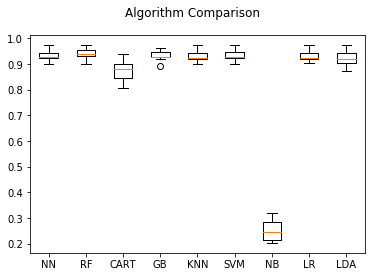

In [33]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

print("RF: Classification Report")
print(classification_report(y_test, y_pred))

[[457   0]
 [ 26   0]]
0.9461697722567288
RF: Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       457
           2       0.00      0.00      0.00        26

    accuracy                           0.95       483
   macro avg       0.47      0.50      0.49       483
weighted avg       0.90      0.95      0.92       483



/Users/friends/anaconda3/envs/udacity-ehr-env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
alphas = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
np.shape(coefs)


(100, 92)

In [37]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

0.19864824604496834

In [38]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns).head(60)

age                                    4.523794e-04
diabetes                               1.811845e-01
chd                                   -8.392225e-02
htn                                    1.732329e-02
cancer                                -1.388235e-01
asthma                                -5.263432e-02
copd                                  -5.514393e-02
autoimmune_dis                         4.145813e-01
er_referral                            0.000000e+00
swab_type_Nasal                        0.000000e+00
swab_type_Nasopharyngeal              -7.856678e-03
swab_type_Oropharyngeal                2.028786e-02
test_name_Rapid COVID-19 Test         -1.270803e-02
test_name_SARS COV 2 RNA RTPCR         0.000000e+00
test_name_SARS COV2 NAAT              -0.000000e+00
test_name_SARS CoV w/CoV 2 RNA         1.322782e-02
test_name_SARS-CoV-2, NAA             -0.000000e+00
cough_severity_Mild                    6.097194e-04
cough_severity_Mild                    0.000000e+00
cough_severi